### Meningococcal disease 

The given dataset consists of time series data separated by years for different countries for the Meningococcal disease. It is provided by the WHO. 

The diseasse has a high mortality rate untreated, but is vaccine preventable. https://en.wikipedia.org/wiki/Meningococcal_disease
It is most dominant in developing countries, where the fatality rate is between 10 and 20 percent. 

The bacteria is harming the meninges - which are the membranes that envelop the brain and spinal chord. The central nervous system is thus affected. Survivors suffer usually permanent brain damage. 

When patients are diagnosed, large dose of antibiotics are provided. But it takes several days such that the toxin is neutralized from the body. 

The dataset is expected to show a significant spike in 2009-2010. Almost 1000 people died in the epidemic outbreak https://en.wikipedia.org/wiki/2009%E2%80%932010_West_African_meningitis_outbreak. Nigeria was here the most affected country. 

The deadliest outbreak however happened in 1996 with over 10000 killed https://www.who.int/csr/don/1996_03_01b/en/. 

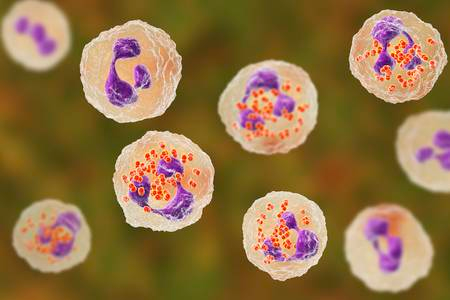

The upper picture shows the Nacterium meningitis (taken from https://www.123rf.com/stock-photo/meningococcal.html?sti=nung36zbs8z7jqkqrq|)

In [ ]:
!pip install chart_studio

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import os
import chart_studio.plotly as py  # plot package
import chart_studio.plotly
import numpy as np # linear algebra
import pandas as pd  # data-table package built upon numpy
import pycountry # lookup package for ISO-codes for countries of this blue, blue planet
from plotly.offline import iplot, init_notebook_mode  #iplot is for plotting into a jupyter
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
suspected_cases = pd.read_csv('/kaggle/input/meningococcal-meningitis-countrywise-data/Number of suspected meningitis cases reported.csv')
suspected_deaths = pd.read_csv('/kaggle/input/meningococcal-meningitis-countrywise-data/Number of suspected meningitis deaths reported.csv')
epidemic_districts = pd.read_csv('/kaggle/input/meningococcal-meningitis-countrywise-data/Number of meningitis epidemic districts.csv')

First have a look at the dataframes:

In [ ]:
suspected_cases.head()

In [ ]:
suspected_deaths.head()

In [ ]:
epidemic_districts.head()

In [ ]:
suspected_cases.shape

In [ ]:
suspected_deaths.shape

In [ ]:
epidemic_districts.shape

The number of countries is in the suspected_deaths table different to the other epidemic district and suspected_cases tables. Also the data points collected (indicated by the "Country" row) shows differences between the tables. 

Now let's clean the data s.t. all missing values are represented as NaN's, the datatype is changed to numberic. 
For this analysis it seems easiest to have the columns as countries and rows as ascending years. 

A very important step is the handling of NaN values. Here I use the interpolation method of pandas "pad" https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html. It is a forward filling method that simply replaces preceeding values. 
The dataset consists of a lot of NaN's, so it is seems for some rows tricky to do a linear or polynomial interpolation. 

In [ ]:
def clean_df(df):
    """
     - change here the year as the row index, and drop the "Country" row which has the year
     - change the index as int
     - reverse years ascending
     - replace "Not applicable" and "No data" values with NaN
     - change dtype to numeric
     - fill in NaN's with existing Data (interpolate "pad")  
    """
    df = df.T
    df.columns = df.iloc[0]
    df = df.iloc[1:]
    df.index = df["Country"]
    df = df.drop("Country", 1)
    df.index.names = ['Year']
    df.index = np.array(df.index).astype(int)
    df.columns.names = ["Country"]
    df = df.sort_index()
    
    
    df = df.replace("Not applicable", "NaN")
    df = df.replace("No data", "NaN")
    
    df = df.apply(pd.to_numeric, errors='coerce')
    df = df.interpolate("pad")
    return df

In [ ]:
suspected_cases = pd.read_csv('/kaggle/input/meningococcal-meningitis-countrywise-data/Number of suspected meningitis cases reported.csv')
suspected_deaths = pd.read_csv('/kaggle/input/meningococcal-meningitis-countrywise-data/Number of suspected meningitis deaths reported.csv')
epidemic_districts = pd.read_csv('/kaggle/input/meningococcal-meningitis-countrywise-data/Number of meningitis epidemic districts.csv')

In [ ]:
suspected_cases = clean_df(suspected_cases)
suspected_deaths = clean_df(suspected_deaths)
epidemic_districts = clean_df(epidemic_districts)

In [ ]:
suspected_cases

This looks already cleaner :) Now let's start with some visualization

### How do suspected cases / deaths and epidemic distric counts look with respect to time? 

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(25, 10), dpi=200)
suspected_cases.plot.area(ax=axes[0], legend=True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
suspected_deaths.plot.area(ax=axes[1], legend=True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
epidemic_districts.plot.area(ax=axes[2], legend=True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
axes[0].set_title('suspected cases')
axes[1].set_title('suspected deaths')
axes[2].set_title('epidemic districs')
plt.tight_layout()

Well indeed there is a huge spike right at 1996. At the years of 2009-2010 is also a smaller spike. The epidemic districs and suspected cases plots show indeed that in these years epidmic took place! 

### How does the cumulative sum look for the country wise distribution? 

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(30,15), dpi=100)
suspected_cases.sum().plot.pie(y="Country", ax=axes[0])
suspected_deaths.sum().plot.pie(y="Country", ax=axes[1])
epidemic_districts.sum().plot.pie(y="Country", ax=axes[2])
axes[0].set_title('suspected cases')
axes[1].set_title('suspected deaths')
axes[2].set_title('epidemic districs')
axes[0].set_ylabel('') # remove None
axes[1].set_ylabel('') 
axes[2].set_ylabel('')
plt.tight_layout()

Well here we see that the most affected countries were from 2009 Sudan, Sout-Sudan, Nigeria and Senegal. 
From the suspected deaths there is a more broad distribution across countries. This measurements started 1965. So different epidemics are captured. There does not seem be one general hotspot with most suspected deaths throughout this time period (1965-2014). 

The following plots repeat the same data analysis, just showing the distribution for each year and each country as a bar and boxplot.

In [ ]:
fig, axes = plt.subplots(3,1, figsize=(15,30), dpi=100)
suspected_deaths.plot.barh(ax=axes[0], rot=0).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
axes[0].set_title('suspected_deaths')
suspected_cases.plot.barh(ax=axes[1], rot=0).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
axes[1].set_title('suspected_cases')
epidemic_districts.plot.barh(ax=axes[2], rot=0).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
axes[2].set_title('epidemic_districts')
plt.tight_layout()

In [ ]:
fig, axes = plt.subplots(3,1, figsize=(12,15), dpi=100)
suspected_deaths.plot.box(ax=axes[0], rot=90).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
axes[0].set_title('suspected_deaths')
suspected_cases.plot.box(ax=axes[1], rot=90).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
axes[1].set_title('suspected_cases')
epidemic_districts.plot.box(ax=axes[2], rot=90).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
axes[2].set_title('epidemic_districts')
plt.tight_layout()

### Let's have a look at the cumulative sum distribution of cases and show them color-coded

Thanks to: https://www.kaggle.com/fiordilatte/2017-happiness-world-map :) 

In [ ]:
def lookup(countries):
    result = []
    for i in range(len(countries)):
        try:
            result.append(pycountry.countries.get(name=countries[i]).alpha_3)
        except:
            try:
                result.append(pycountry.countries.get(official_name=countries[i]).alpha_3)
            except:
                result.append('undefined')
    return result

In [ ]:
countries = suspected_deaths.T.index.values
codes=lookup(countries)
suspected_deaths = suspected_deaths.T
suspected_deaths["Codes"] = codes
suspected_deaths=suspected_deaths[~suspected_deaths.Codes.isin(['undefined'])]

In [ ]:
countries = suspected_cases.T.index.values
codes=lookup(countries)
suspected_cases = suspected_cases.T
suspected_cases["Codes"] = codes
suspected_cases=suspected_cases[~suspected_cases.Codes.isin(['undefined'])]

In [ ]:
countries = epidemic_districts.T.index.values
codes=lookup(countries)
epidemic_districts = epidemic_districts.T
epidemic_districts["Codes"] = codes
epidemic_districts=epidemic_districts[~epidemic_districts.Codes.isin(['undefined'])]

In [ ]:
def get_data_layout_map(df_, cbar_label='sum over previous years', title_plot='epidemic_district'):
    df = pd.DataFrame(df_.iloc[:,:-1].sum(axis=1))
    df.columns = ['sum']
    df["Codes"] = df_.iloc[:,-1]

    data = [ dict(
        type = 'choropleth',
        locations = df['Codes'],
        z = df['sum'],
        text = df.index,
       colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"], \
                     [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
       autocolorscale = False,
       reversescale = True,
        marker = dict(
           line = dict (
               color = 'rgb(180,180,180)',
               width = 0.5
           ) ),
        colorbar = dict(
           autotick = False,
           title = cbar_label),
    ) ]


    layout = dict(
        title = title_plot,
        geo = dict(
            showframe = False,
            showcoastlines = False,
            projection = dict(
                type = 'Mercator'
            )
        )
    )
    return data, layout

In [ ]:
data, layout = get_data_layout_map(epidemic_districts, cbar_label='sum over previous years', title_plot='epidemic_districts 2003-2014')
fig = dict( data=data, layout=layout )
iplot(fig, validate=False)

In [ ]:
data, layout = get_data_layout_map(suspected_cases, cbar_label='sum over previous years', title_plot='suspected_cases 2009-2014')
fig = dict( data=data, layout=layout )
iplot(fig, validate=False)

In [ ]:
data, layout = get_data_layout_map(suspected_deaths, cbar_label='sum over previous years', title_plot='suspected_deaths 1965-2014')
fig = dict( data=data, layout=layout )
iplot(fig, validate=False)

Well, indeed we can see that there the is something like an African Meningitis belt https://en.wikipedia.org/wiki/African_meningitis_belt. 
Unfortunately children are most likely to be affected. In 2009 more than 90000 cases were reported in genere, which points out to a large inequality in the medical standards between countries. 
In the US 2011 there were only 800 reported cases.

In general this analysis shows that there should be high caution and help to provide medical aid in the sub-Sahara countries to prevent outbreaks similar to 1996 and 2009. 

Please upvote if this notebook was helpful for you :) 